In [ ]:
# Glove embedding can be downloaded by uncommenting the following
# !wget http://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove.6B.zip

In [3]:
#Machine Learning approaches

import pandas as pd
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns

In [4]:
# Reads and stores csv file in the dataframe
data = pd.read_csv("train.csv")

In [5]:
# Displays Top 5 rows in data
data.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


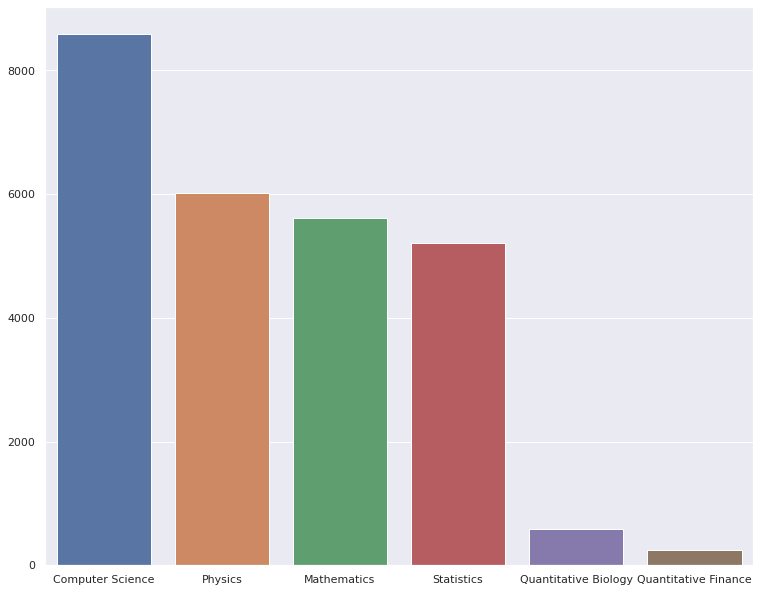

In [6]:
# Plot to show data distributions among classes
sns.set(rc={'figure.figsize':(12.7,10.27)})
chart = sns.barplot(x=data.columns[3:],y=data.iloc[:,3:].sum().values)

In [7]:
# Method to preprocess text 
def preprocessor(txt):

  #replacing integers and decimals
  modified_txt = txt.str.replace(r'\d+(\.\d+)?', 'num')

  #removing punctuation
  modified_txt = modified_txt.str.replace(r'[^\w\d\s]',' ')

  #removing extra white space
  modified_txt = modified_txt.str.replace(r'\s+', ' ')

  #remove start and end white space
  modified_txt = modified_txt.str.strip().str.lower()

  return modified_txt

In [8]:
# Title and abstract are concatenated 
text = data['TITLE'] + ' '+ data['ABSTRACT']

In [9]:
# Example of text before processing
text[0]

"Reconstructing Subject-Specific Effect Maps   Predictive models allow subject-specific inference when analyzing disease\nrelated alterations in neuroimaging data. Given a subject's data, inference can\nbe made at two levels: global, i.e. identifiying condition presence for the\nsubject, and local, i.e. detecting condition effect on each individual\nmeasurement extracted from the subject's data. While global inference is widely\nused, local inference, which can be used to form subject-specific effect maps,\nis rarely used because existing models often yield noisy detections composed of\ndispersed isolated islands. In this article, we propose a reconstruction\nmethod, named RSM, to improve subject-specific detections of predictive\nmodeling approaches and in particular, binary classifiers. RSM specifically\naims to reduce noise due to sampling error associated with using a finite\nsample of examples to train classifiers. The proposed method is a wrapper-type\nalgorithm that can be used 

In [10]:
# Preprocessing of text using method preprocessor
text = preprocessor(text)

In [11]:
# Example of text after processing
text[0]

'reconstructing subject specific effect maps predictive models allow subject specific inference when analyzing disease related alterations in neuroimaging data given a subject s data inference can be made at two levels global i e identifiying condition presence for the subject and local i e detecting condition effect on each individual measurement extracted from the subject s data while global inference is widely used local inference which can be used to form subject specific effect maps is rarely used because existing models often yield noisy detections composed of dispersed isolated islands in this article we propose a reconstruction method named rsm to improve subject specific detections of predictive modeling approaches and in particular binary classifiers rsm specifically aims to reduce noise due to sampling error associated with using a finite sample of examples to train classifiers the proposed method is a wrapper type algorithm that can be used with different binary classifiers

In [12]:
# Word_vectorizer is initialized with L2 normalization and vectors are extracted for unigram and bigrams
word_vectorizer=TfidfVectorizer(min_df=1, smooth_idf=True, norm="l2",tokenizer=lambda x: x.split(),sublinear_tf=True, ngram_range=(1,3))
# verctorizer is fit on the traning text  
word_vectorizer.fit(text)
# generates vectorized features
features = word_vectorizer.transform(text)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [13]:
# Targets columns are stored in df
targets = data[data.columns[3:]]

In [14]:
# Data is shuffled and split into training and testing set in the ratio 80:20
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size= 0.2,random_state = 24)

In [15]:
# Data is trained on Naive Bayes to obtain the baseline model
from sklearn.naive_bayes import MultinomialNB
# Since the target is multi-label a OnevsRest wrapper has to be applied to train the model
# The wrapper ensures each class is fitted against other classes
mnb = OneVsRestClassifier(MultinomialNB()).fit(X_train, y_train)

# obtains the predictions for test data
mnbpredictions = mnb.predict(X_test)

# displays the classification report for the model
print(classification_report(mnbpredictions,y_test))

              precision    recall  f1-score   support

           0       0.60      0.87      0.71      1183
           1       0.20      1.00      0.33       243
           2       0.10      0.99      0.18       114
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

   micro avg       0.26      0.90      0.41      1540
   macro avg       0.15      0.48      0.20      1540
weighted avg       0.50      0.90      0.61      1540
 samples avg       0.29      0.33      0.30      1540



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
# logistic regression with l2 normalization
lrclassifier=OneVsRestClassifier(LogisticRegression(penalty="l2"))
lrclassifier.fit(X_train, y_train)
lrpredictions=lrclassifier.predict(X_test)

print(classification_report(lrpredictions,y_test))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1586
           1       0.68      0.98      0.80       859
           2       0.62      0.93      0.75       761
           3       0.48      0.86      0.62       555
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

   micro avg       0.64      0.89      0.74      3761
   macro avg       0.43      0.60      0.49      3761
weighted avg       0.68      0.89      0.76      3761
 samples avg       0.68      0.72      0.69      3761



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
# Linear SVC model is trained with l2 normalization of hinge loss (standard parameter to calculate loss for linear svc)
classifier=OneVsRestClassifier(LinearSVC(penalty="l2",loss='hinge',class_weight = "balanced",fit_intercept=False))
classifier.fit(X_train, y_train)
predictions=classifier.predict(X_test)
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1839
           1       0.83      0.94      0.88      1079
           2       0.80      0.85      0.83      1069
           3       0.79      0.79      0.79      1001
           4       0.05      0.60      0.09        10
           5       0.21      0.91      0.34        11

   micro avg       0.81      0.85      0.83      5009
   macro avg       0.59      0.82      0.63      5009
weighted avg       0.83      0.85      0.84      5009
 samples avg       0.84      0.84      0.82      5009



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
# Deep learning approach (BiLSTM)

import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input,LSTM, Bidirectional,Dense
from keras.models import Model
from keras.layers.embeddings import Embedding

In [19]:
# Same preprocessing is applied
# Tokenizer is initialized and fit on text to create a vocabulary of all the words in the samples
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(text)

# size of vocabulary is obtained
vocab_length = len(word_tokenizer.word_index) + 1

In [20]:
# maximum length a sample is obtained for padding limit
max_length = max(list(text.apply(lambda x: len(x))))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(text, targets, test_size= 0.2,random_state = 24)

In [22]:
# Text is tokenized and converted from text to sequences of integers
X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

# post padding with 0 to generate sequences of same length for neural network
X_train = pad_sequences(X_train, padding='post', maxlen=max_length)
X_test = pad_sequences(X_test, padding='post', maxlen=max_length)

In [23]:
# read glove embeddings 
glove_file = open('/content/glove.6B.200d.txt', encoding="utf8")

embeddings_dictionary = dict()

# all the words in glove as keys and corresponding embedding vector as values is stored in the dictionary
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

In [24]:
# a matrix is created with all words in the current vocabulary and corresponding glove vector
embedding_matrix = np.zeros((vocab_length, 200))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [25]:
# Input layer with max length of sentence/sequence
inputs = Input(shape=(max_length,))

# creates embeeddings for all the inputs based on matrix obtained in above cell 
embedding_layer = Embedding(vocab_length, 200, weights=[embedding_matrix], trainable=False)(inputs)

# BiLSTM layer with 100 units is moderate amount units for data
BiLSTM_Layer = Bidirectional(LSTM(100))(embedding_layer)

# Output layer with 6 neurons for 6 classes and sigmoid activation function for output in range (0,1)
dense_layer = Dense(6, activation='sigmoid')(BiLSTM_Layer)

# creates the model
model = Model(inputs=inputs, outputs=dense_layer)

# model hyper parameters are binary cross entropy loss and adam optimizer metric displayed is accuracy 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [26]:
# displays structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2796)]            0         
                                                                 
 embedding (Embedding)       (None, 2796, 200)         10446800  
                                                                 
 bidirectional (Bidirectiona  (None, 200)              240800    
 l)                                                              
                                                                 
 dense (Dense)               (None, 6)                 1206      
                                                                 
Total params: 10,688,806
Trainable params: 242,006
Non-trainable params: 10,446,800
_________________________________________________________________


In [27]:
# since the length of samples is high batch size is kept high, traning for 20 epochs, history stores the loss and metricof all the epochs 
history = model.fit(X_train, y_train, batch_size=256, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
53/53 [==============================] - 97s 2s/step - loss: 0.4100 - acc: 0.5523 - val_loss: 0.3087 - val_acc: 0.7211
Epoch 2/20
53/53 [==============================] - 90s 2s/step - loss: 0.2830 - acc: 0.7278 - val_loss: 0.2719 - val_acc: 0.7166
Epoch 3/20
53/53 [==============================] - 90s 2s/step - loss: 0.2586 - acc: 0.7348 - val_loss: 0.2523 - val_acc: 0.7500
Epoch 4/20
53/53 [==============================] - 90s 2s/step - loss: 0.2348 - acc: 0.7486 - val_loss: 0.2350 - val_acc: 0.7569
Epoch 5/20
53/53 [==============================] - 90s 2s/step - loss: 0.2204 - acc: 0.7507 - val_loss: 0.2273 - val_acc: 0.7533
Epoch 6/20
53/53 [==============================] - 90s 2s/step - loss: 0.2089 - acc: 0.7532 - val_loss: 0.2162 - val_acc: 0.7396
Epoch 7/20
53/53 [==============================] - 90s 2s/step - loss: 0.2002 - acc: 0.7555 - val_loss: 0.2123 - val_acc: 0.7312
Epoch 8/20
53/53 [==============================] - 90s 2s/step - loss: 0.1933 - acc: 0.76

In [28]:
# obtain predictions for model
y_pred = model.predict(X_test)

In [29]:
# loop to convert values predicted values in range (0,1) to 0 and 1 with threshold 0.5
for y in range(len(y_pred)):
    for j in range(6):
        if y_pred[y][j] < 0.5:
            y_pred[y][j] = 0
        else:
            y_pred[y][j] = 1   

In [30]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1784
           1       0.79      0.93      0.85      1056
           2       0.76      0.81      0.79      1073
           3       0.76      0.75      0.76      1023
           4       0.34      0.49      0.40        81
           5       0.52      0.71      0.60        35

   micro avg       0.78      0.81      0.80      5052
   macro avg       0.67      0.75      0.70      5052
weighted avg       0.79      0.81      0.80      5052
 samples avg       0.82      0.82      0.80      5052



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


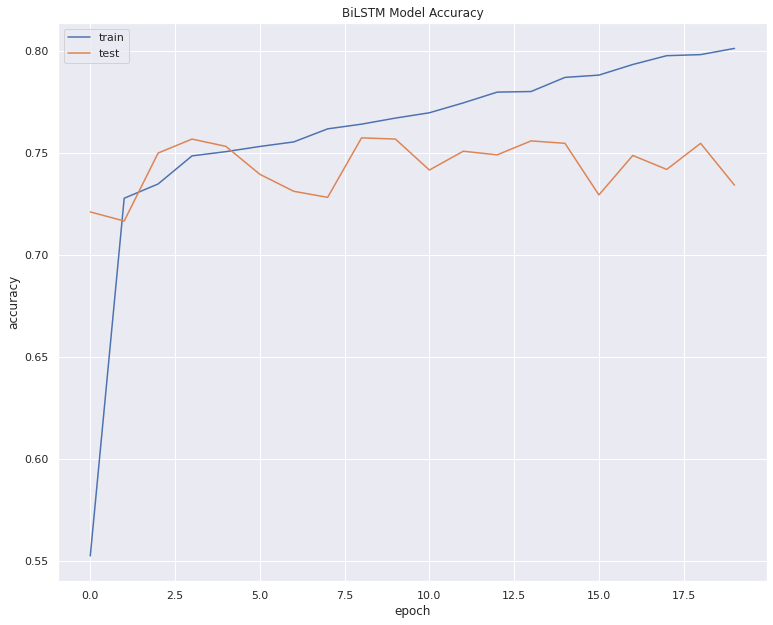

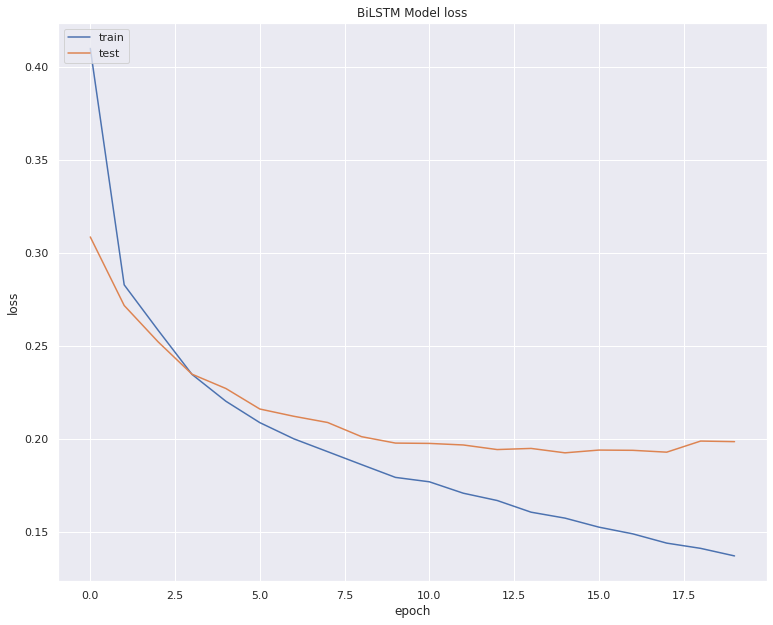

In [31]:
# obtaining plots for both loss and accuracy with each increasing epoch
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('BiLSTM Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('BiLSTM Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [33]:
pip freeze > requirements.txt